<a href="https://colab.research.google.com/github/mmartigani/RoadMapIA/blob/main/Funcion_De_Error_Personalizada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [2]:
# Función que genera al función de pérdida de Huber
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) <= threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [3]:
# El valor más habitual para la función de pérdida de Huber es 1.0
huber_fn = create_huber(1.0)

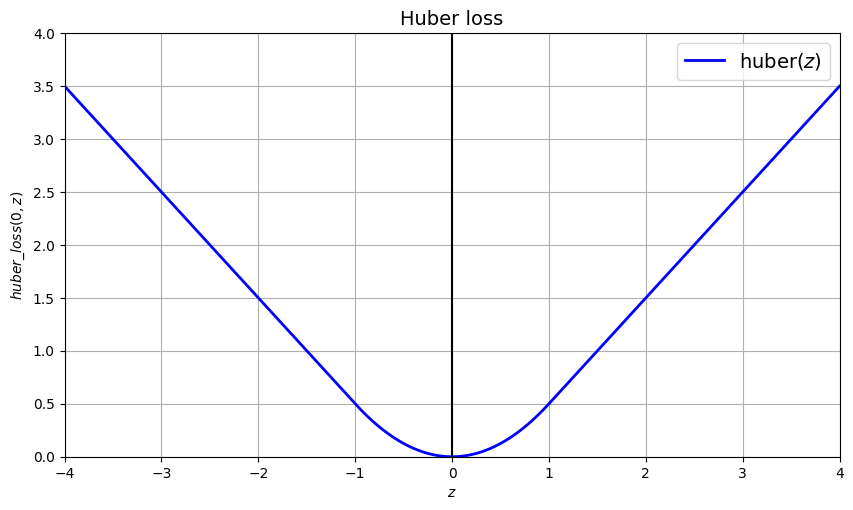

In [4]:
# Representación gráfica de la función de pérdida de Huber
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5.5))

z = np.linspace(-4, 4, 200)

plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")

plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.ylabel("$huber\_loss(0, z)$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [5]:
from tensorflow.keras import datasets

In [6]:
boston_housing = datasets.boston_housing

In [7]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
import pandas as pd

features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

df_train = pd.DataFrame(np.column_stack([X_train, y_train]), columns=features)
df_train.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
5,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,18.5
6,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60,11.3
7,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42,15.6
8,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65,15.6
9,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4


In [9]:
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [10]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_prep = scaler.fit_transform(X_train)
X_val_prep = scaler.transform(X_val)
X_test_prep = scaler.transform(X_test)

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [12]:
network = models.Sequential()
network.add(layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 741 (2.89 KB)

 Trainable params: 741 (2.89 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
network.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['mae']
               )

In [15]:
history = network.fit(X_train_prep,
                      y_train,
                      epochs=50,
                      validation_data=(X_val_prep, y_val))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 625.8450 - mae: 23.0001 - val_loss: 641.2303 - val_mae: 23.7043
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 571.8057 - mae: 21.9474 - val_loss: 626.7640 - val_mae: 23.3877
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 565.5229 - mae: 21.8978 - val_loss: 611.8219 - val_mae: 23.0549
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 518.6109 - mae: 20.6746 - val_loss: 594.8571 - val_mae: 22.6656
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 517.8826 - mae: 20.7237 - val_loss: 573.5952 - val_mae: 22.1749
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 479.6232 - mae: 19.6307 - val_loss: 546.3914 - val_mae: 21.6069
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 470.7358 - mae: 19.2606 - val_loss: 512.0817 - val_mae: 20.9127
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 453.1658 - mae: 19.0296 - val_loss: 470.8048 - val_mae: 20.0341
Epoch 9/50
13/13 ━━━━

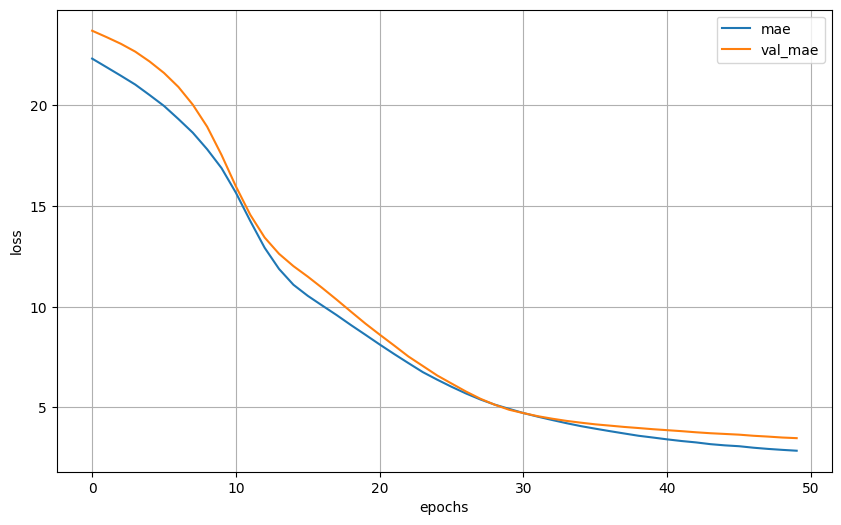

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['mae', 'val_mae']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [17]:
test_loss, test_mae = network.evaluate(X_test_prep, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 33.1163 - mae: 3.5785 


In [18]:
print('test_mae:', test_mae)

test_mae: 3.5557963848114014


In [19]:
network = models.Sequential()
network.add(layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
network.compile(
    loss=create_huber(1.0),
    optimizer='adam',
    metrics=['mae']
               )

In [21]:
history = network.fit(X_train_prep,
                      y_train,
                      epochs=50,
                      validation_data=(X_val_prep, y_val))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 21.4846 - mae: 21.9846 - val_loss: 22.5505 - val_mae: 23.0505
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20.3876 - mae: 20.8876 - val_loss: 22.0499 - val_mae: 22.5499
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.0684 - mae: 20.5654 - val_loss: 21.4848 - val_mae: 21.9781
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.5788 - mae: 20.0777 - val_loss: 20.9712 - val_mae: 21.4712
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.6027 - mae: 19.0988 - val_loss: 20.3972 - val_mae: 20.8972
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.5032 - mae: 19.0023 - val_loss: 19.7331 - val_mae: 20.2331
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 17.5950 - mae: 18.0909 - val_loss: 18.9881 - val_mae: 19.4875
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 17.1324 - mae: 17.6289 - val_loss: 18.0611 - val_mae: 18.5521
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━

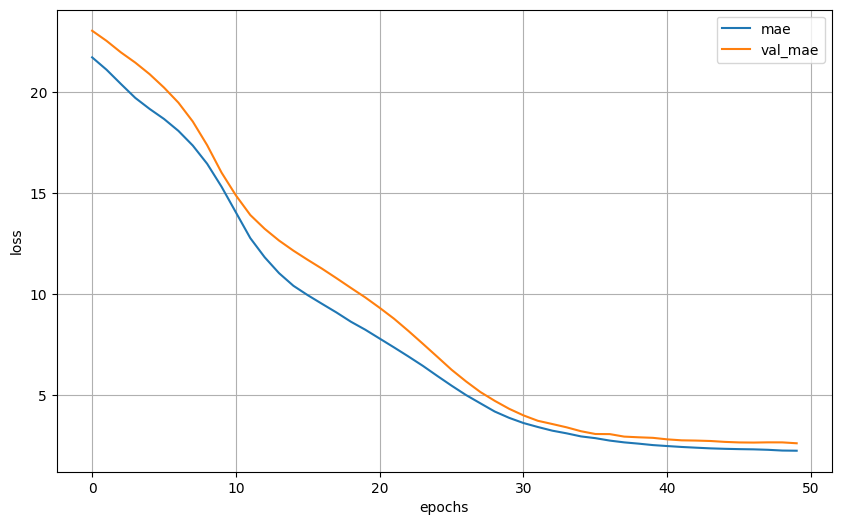

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['mae', 'val_mae']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [23]:
test_loss, test_mae = network.evaluate(X_test_prep, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - loss: 2.2227 - mae: 2.6672


In [24]:
print('test_mae:', test_mae)

test_mae: 2.703967571258545


In [30]:
# Placeholder for the actual huber_fn used in the model
def huber_fn(y_true, y_pred):
    # Replace with your actual huber loss function definition
    return tf.keras.losses.huber(y_true, y_pred)

In [31]:
# Importamos el modelo previamente guardado en disco
import tensorflow as tf
network2 = tf.keras.models.load_model("modelo_huber_loss.keras", custom_objects={'huber_fn': huber_fn})

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
